In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
pd.set_option('Display.max_columns',None)

In [56]:
df=pd.read_csv('House_Rent_Dataset.csv')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


# Preprocessing Data Part 1

In [57]:
df.select_dtypes(include='object').nunique()

,0
Posted On,81
Floor,480
Area Type,3
Area Locality,2235
City,6
Furnishing Status,3
Tenant Preferred,3
Point of Contact,3


In [58]:
df=df.drop(columns=['Floor','Area Locality'],axis=1)
df.head()

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# EDA

<ipython-input-59-0ef71e5540f6>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-59-0ef71e5540f6>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-59-0ef71e5540f6>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-59-0ef71e5540f6>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-59-0ef71e5540f6>:13: UserWarning: set_ticklabels() should only be used with a

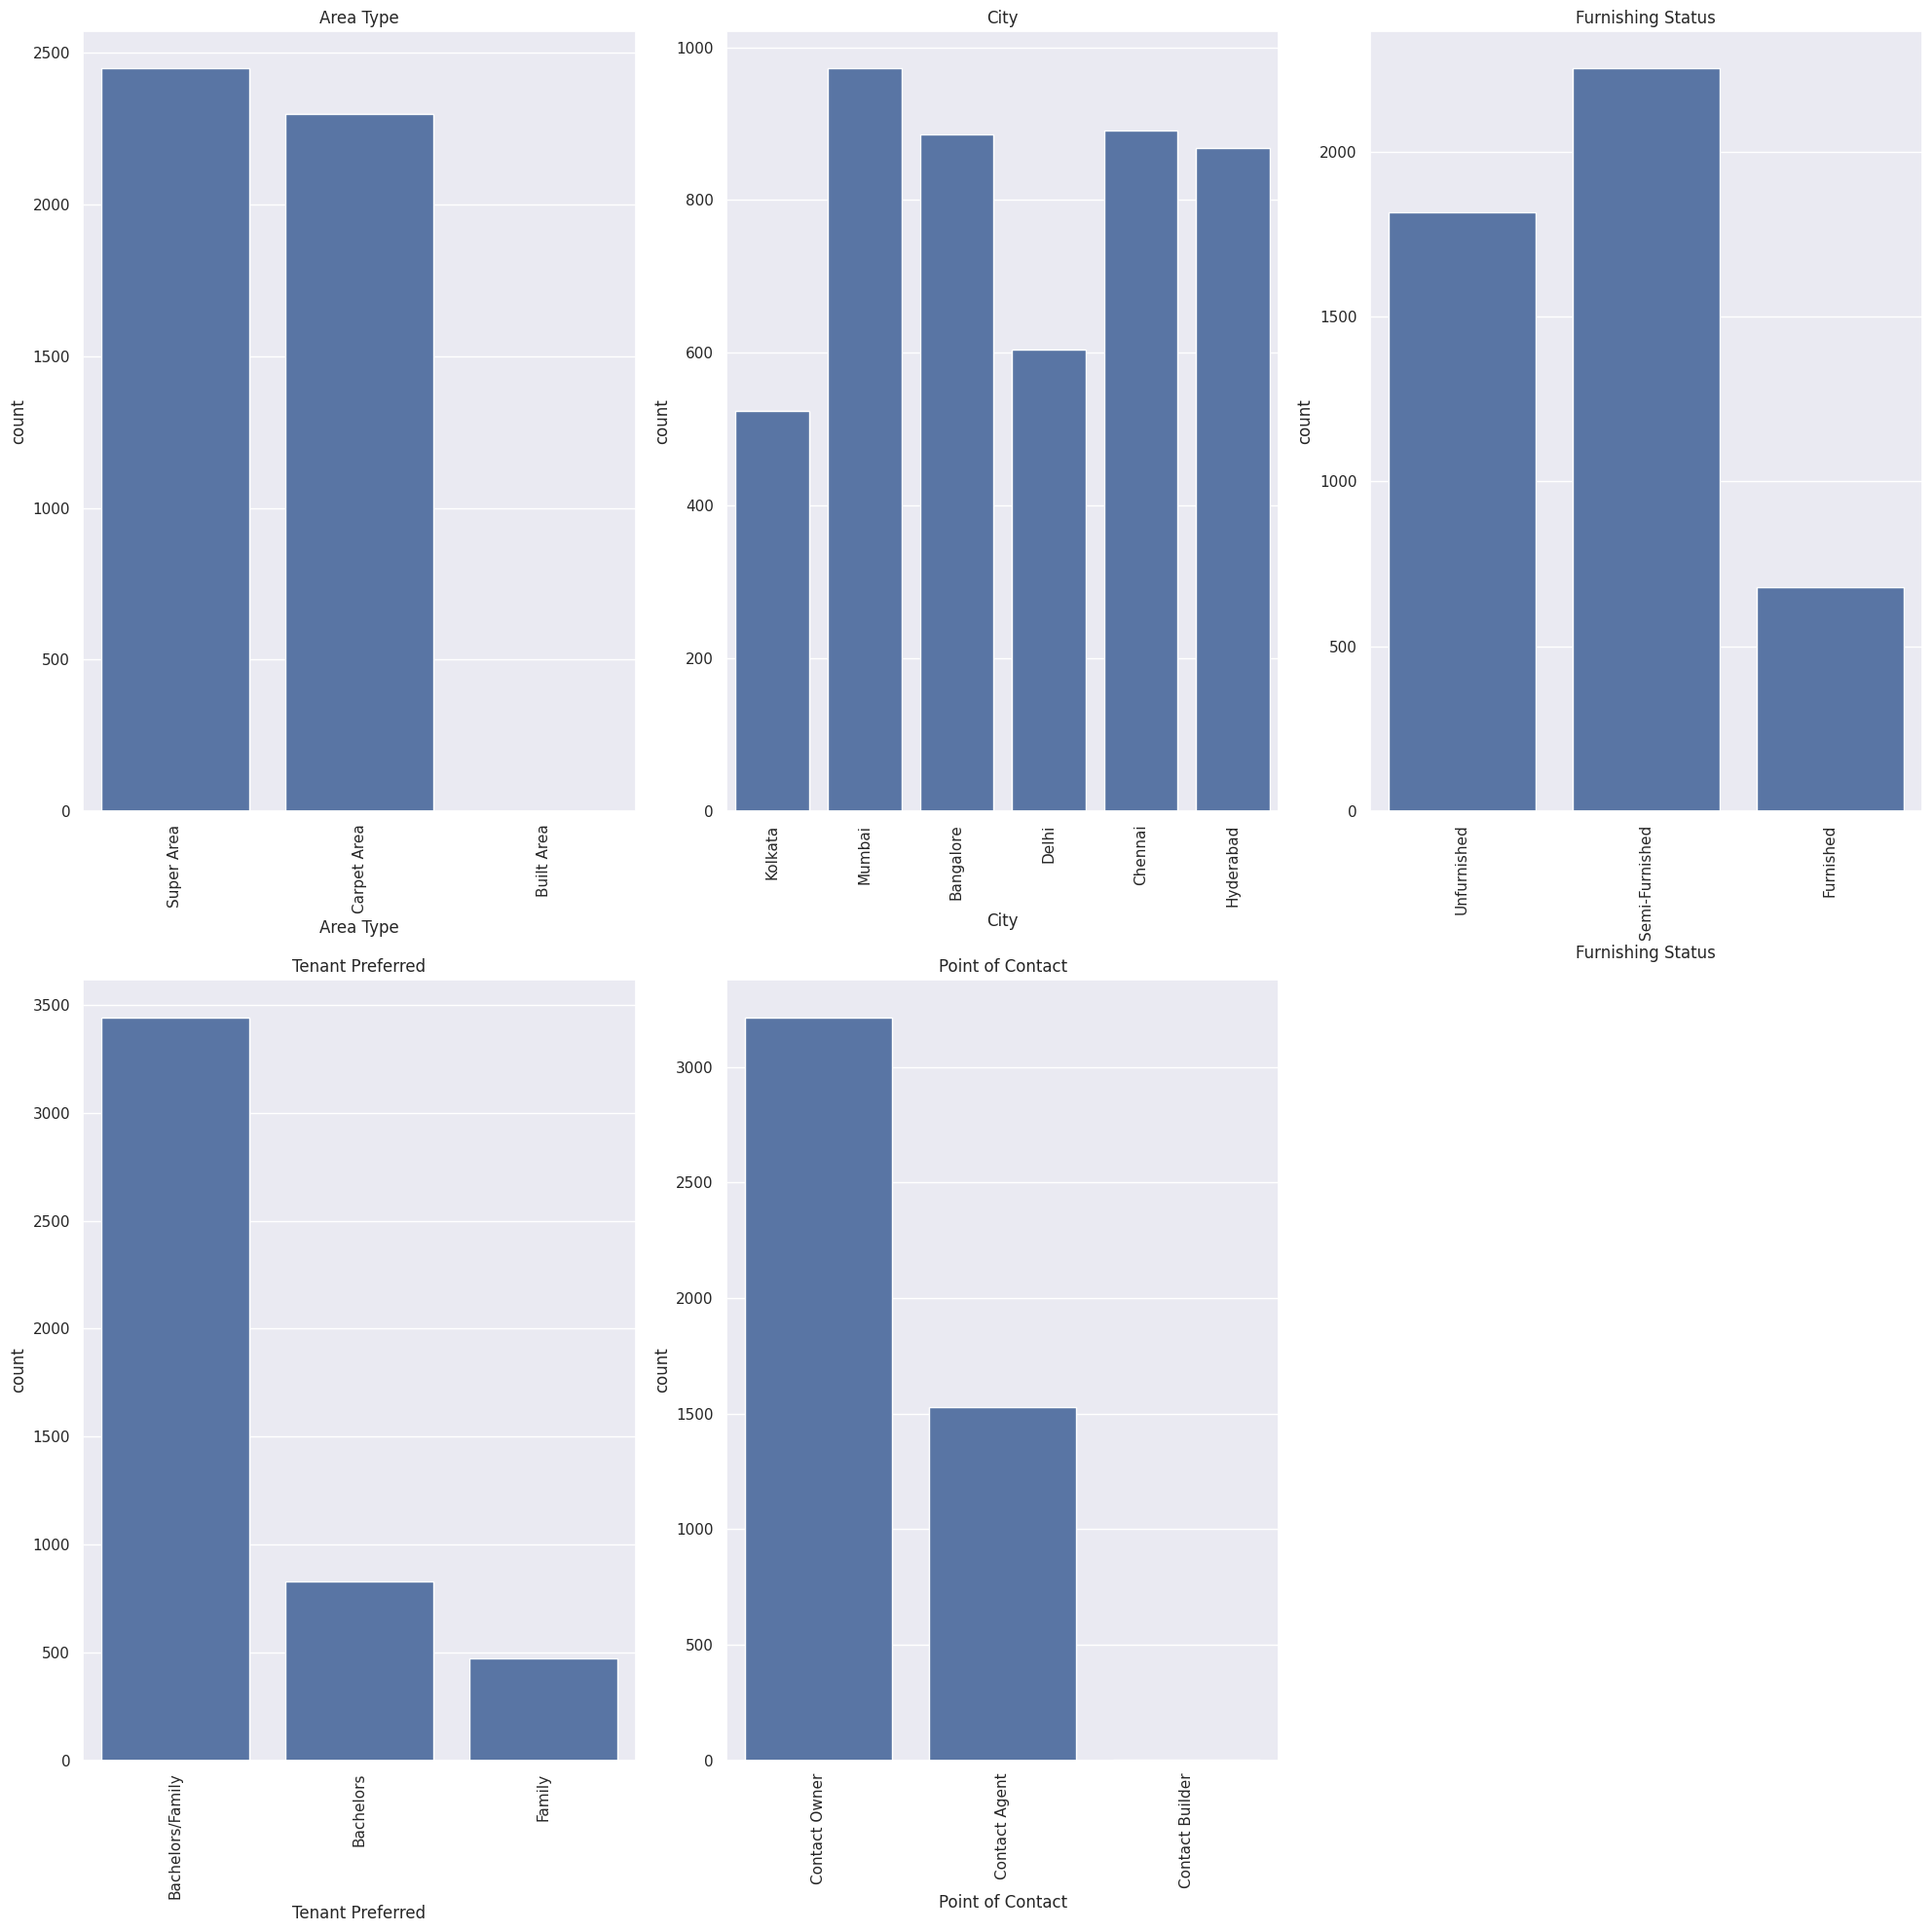

In [59]:
cat_var=df.select_dtypes(include='object').columns.tolist()
cat_var.remove('Posted On')

num_cols=len(cat_var)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,10*num_rows))
axs=axs.flatten()

for i,var in enumerate(cat_var):
  top_values=df[var].value_counts().index
  filtered_df=df[df[var].isin(top_values)]
  sns.countplot(x=var,data=filtered_df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
  axs[i].set_title(var)

if (num_cols < len(axs)):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

<ipython-input-60-4150a2bb05a1>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-60-4150a2bb05a1>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-60-4150a2bb05a1>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-60-4150a2bb05a1>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-60-4150a2bb05a1>:11: UserWarning: set_ticklabels() should only be used with a

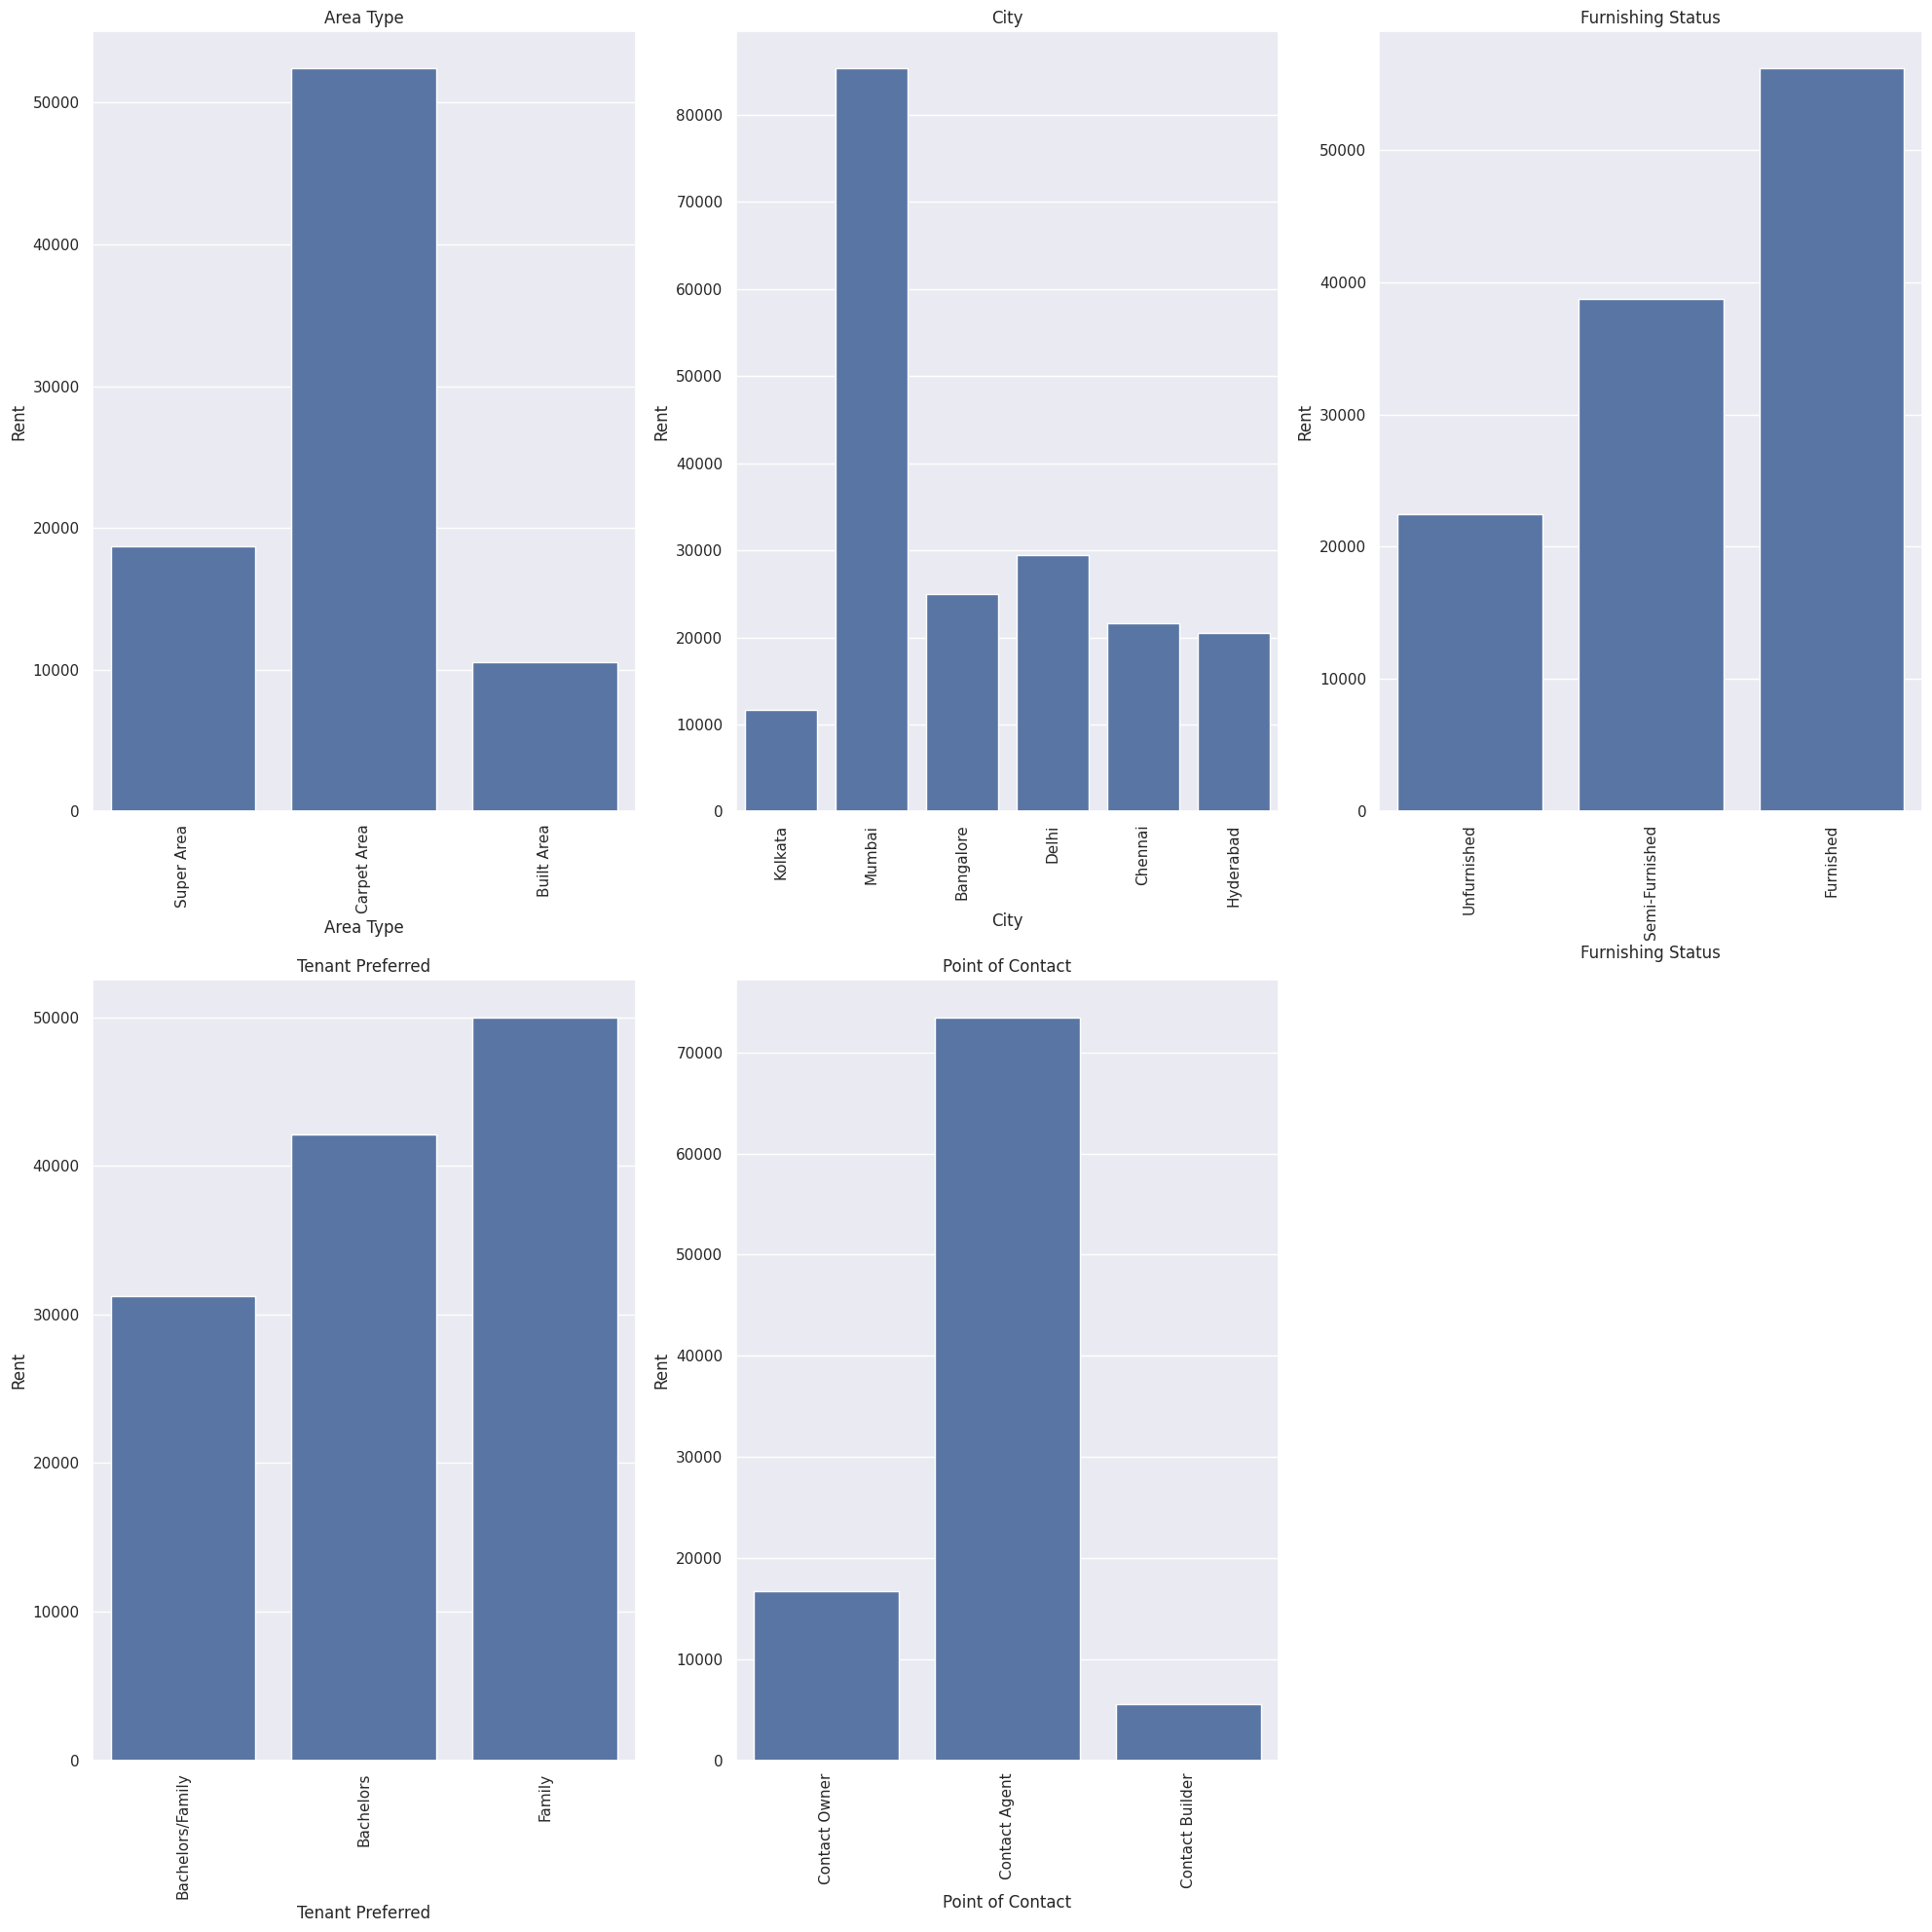

In [60]:
cat_var=df.select_dtypes(include='object').columns.tolist()
cat_var.remove('Posted On')

num_cols=len(cat_var)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,10*num_rows))
axs=axs.flatten()

for i,var in enumerate(cat_var):
  sns.barplot(x=var,y='Rent',data=df,ax=axs[i],errorbar=None)
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
  axs[i].set_title(var)

if (num_cols < len(axs)):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

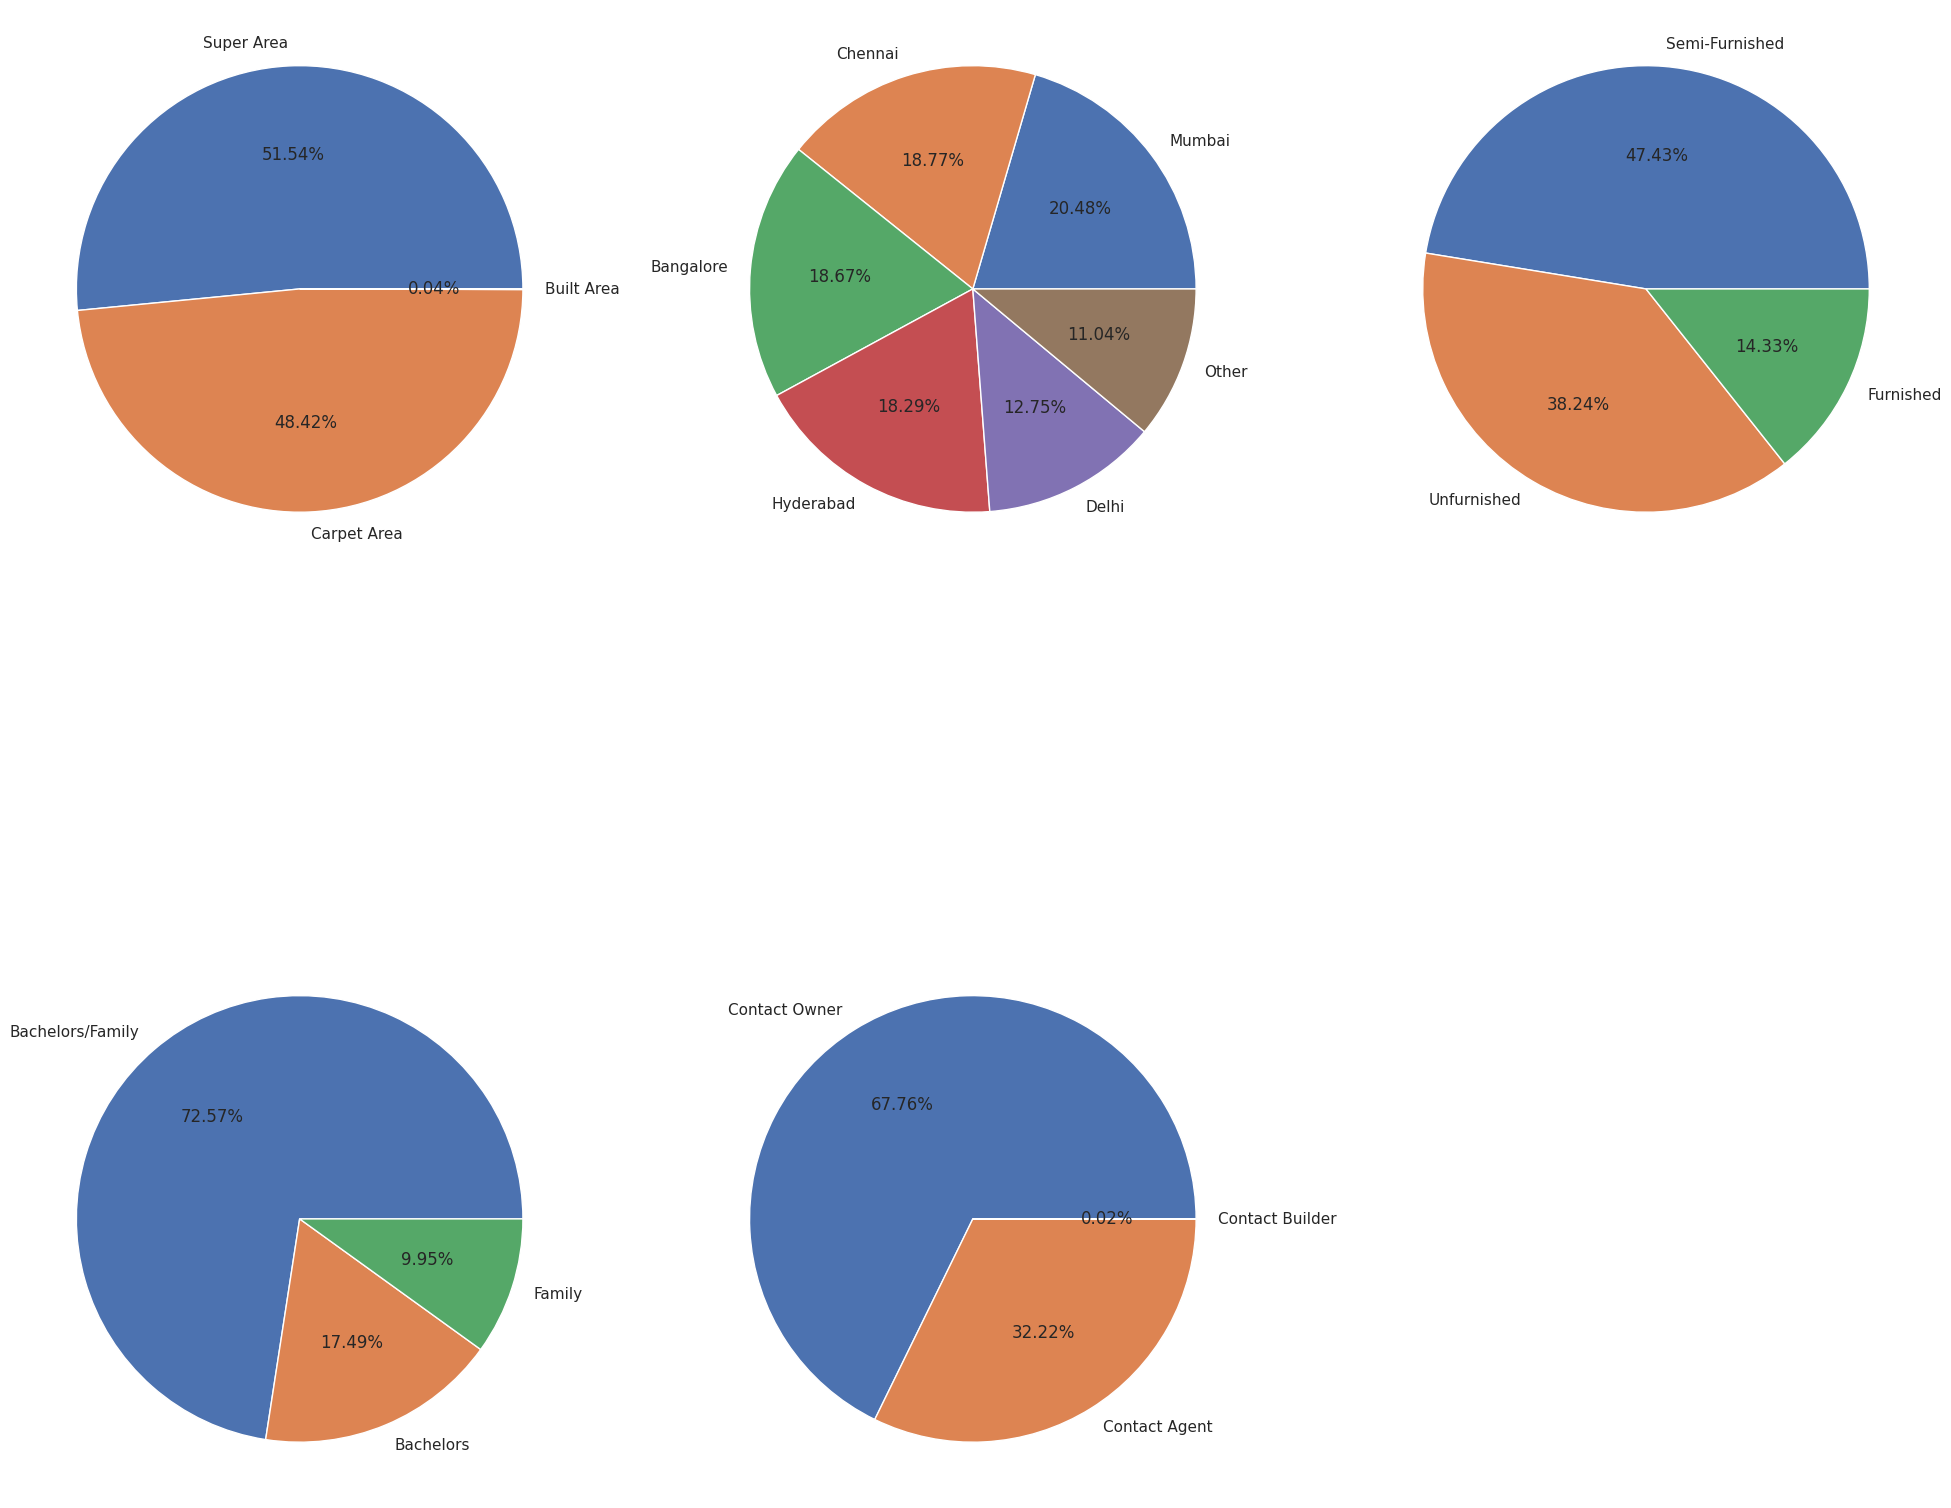

In [61]:
cat_var=df.select_dtypes(include='object').columns.tolist()
cat_var.remove('Posted On')
max_categories=5

num_cols=len(cat_var)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,10*num_rows))
axs=axs.flatten()

for i,var in enumerate(cat_var):
  if i < len(axs):
    cat_counts=df[var].value_counts()

    if len(cat_counts) > max_categories:
      cat_top=cat_counts[:max_categories]
      cat_other=pd.Series(cat_counts[max_categories:].sum(),index=['Other'])
      cat_counts=pd.concat([cat_top,cat_other])
    axs[i].pie(cat_counts,labels=cat_counts.index,autopct="%1.2f%%")

if (num_cols < len(axs)):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

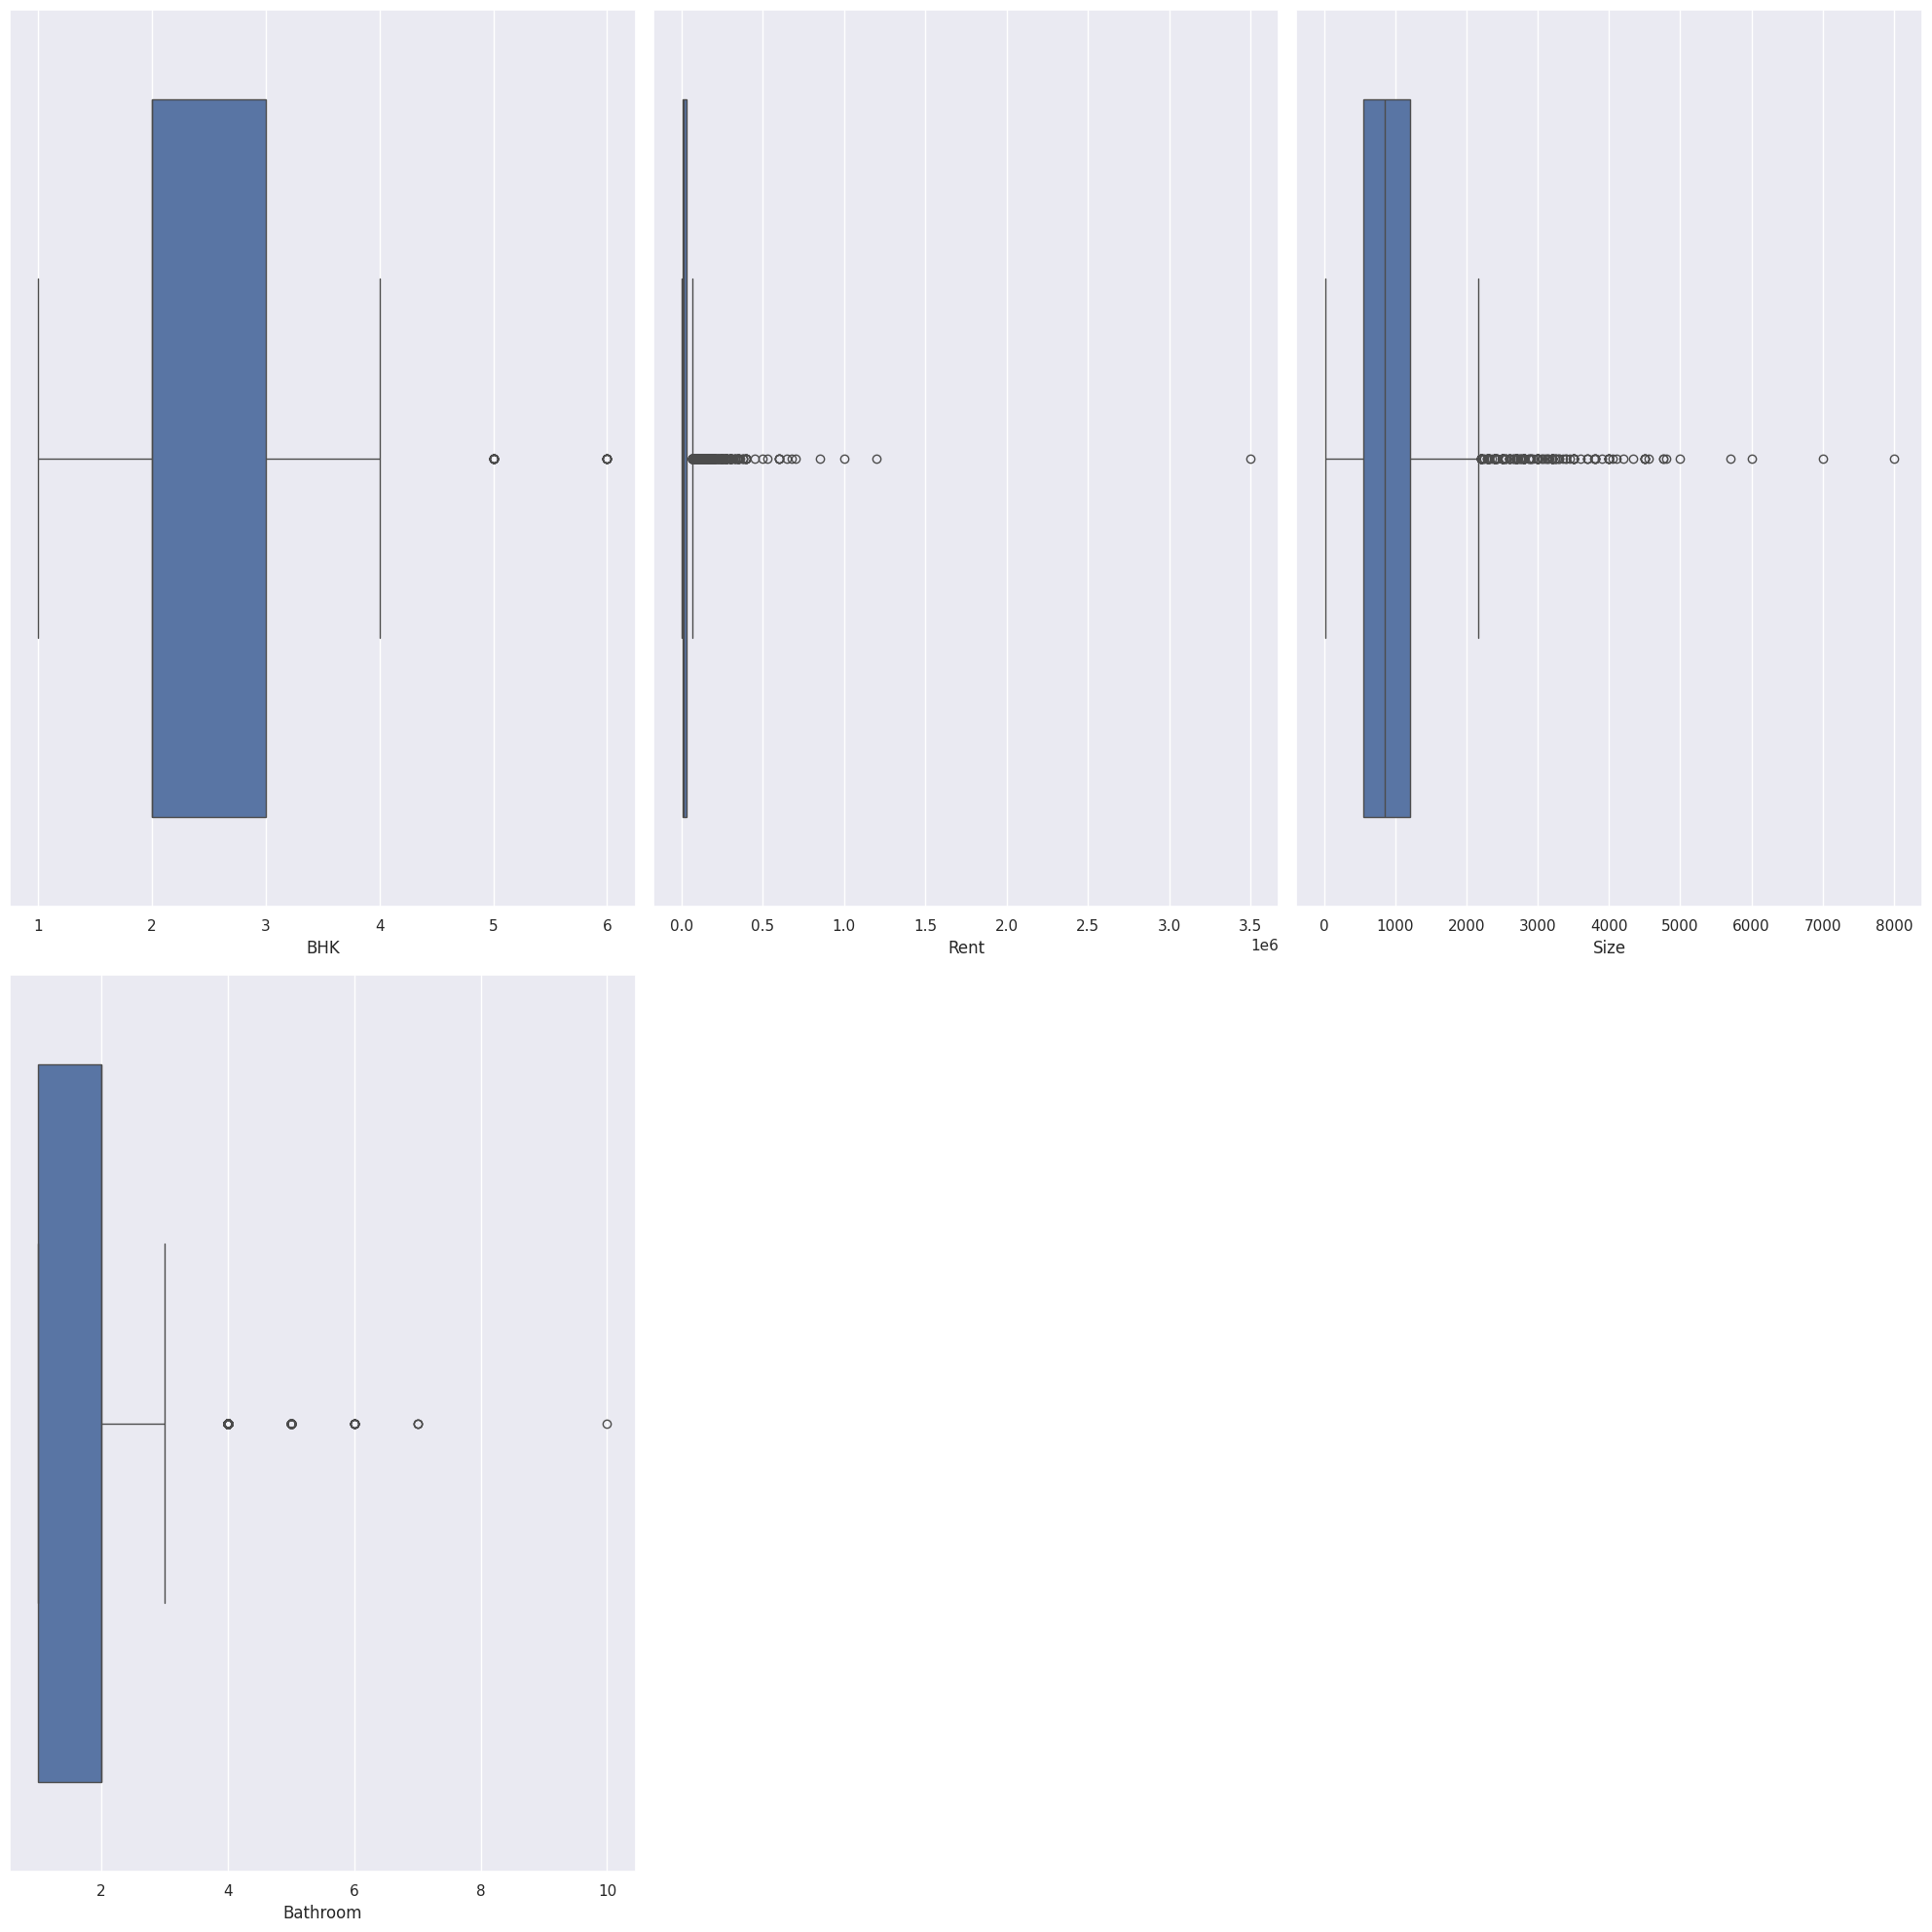

In [62]:
num_vars=df.select_dtypes(include=['int','float']).columns.tolist()

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,10*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.boxplot(x=var,data=df,ax=axs[i])

if (num_cols < len(axs)):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

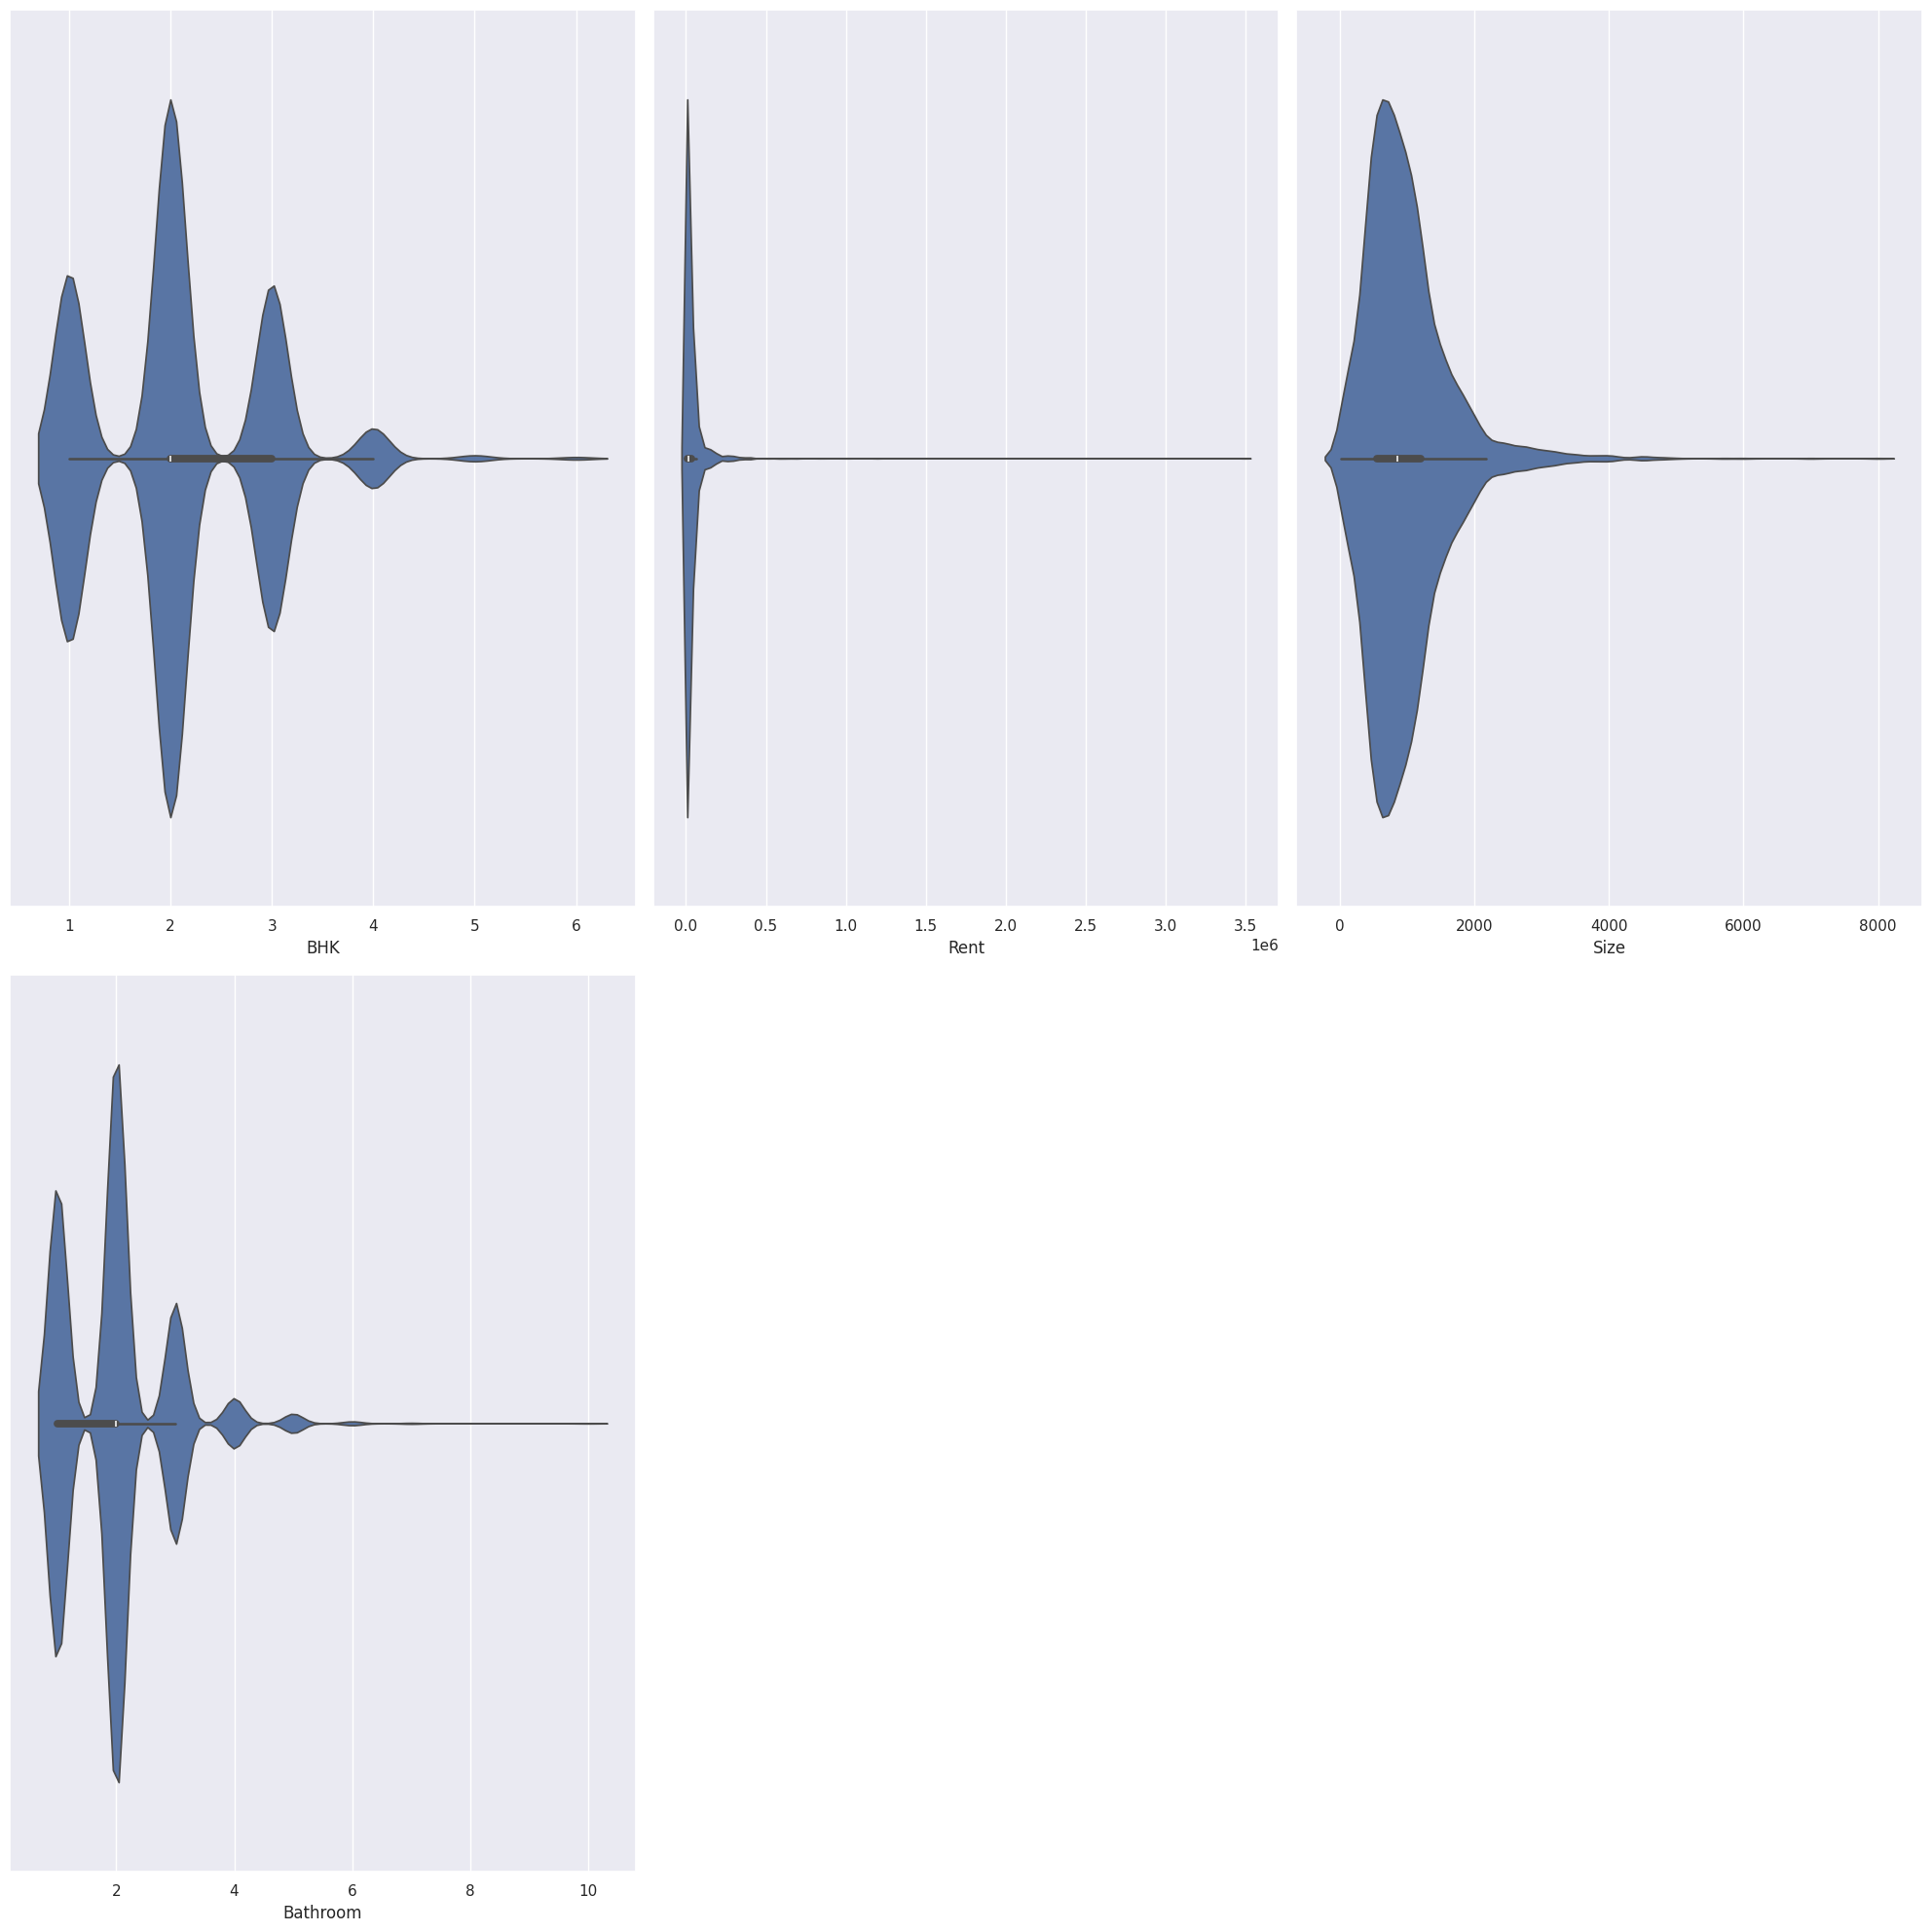

In [63]:
num_vars=df.select_dtypes(include=['int','float']).columns.tolist()

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,10*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.violinplot(x=var,data=df,ax=axs[i])

if (num_cols < len(axs)):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

# Preprocessing Data Part 2

In [64]:
df.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Area Type,0
City,0
Furnishing Status,0
Tenant Preferred,0
Bathroom,0
Point of Contact,0


In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

encoder=LabelEncoder()
for i in df.select_dtypes(include='object').columns:
  df[i]=encoder.fit_transform(df[i])

df.head()

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,26,2,10000,1100,2,4,2,1,2,2
1,21,2,20000,800,2,4,1,1,1,2
2,24,2,17000,1000,2,4,1,1,1,2
3,73,2,10000,800,2,4,2,1,1,2
4,17,2,7500,850,1,4,2,0,1,2


In [66]:
df.shape

(4746, 10)

In [68]:
from scipy import stats

select=['Rent']
zscore=np.abs(stats.zscore(df[select]))
outlier=np.where(zscore >3)[0]
df=df.drop(outlier,axis=0)
df.head()

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,26,2,10000,1100,2,4,2,1,2,2
1,21,2,20000,800,2,4,1,1,1,2
2,24,2,17000,1000,2,4,1,1,1,2
3,73,2,10000,800,2,4,2,1,1,2
4,17,2,7500,850,1,4,2,0,1,2


In [69]:
df.shape

(4680, 10)

<Axes: >

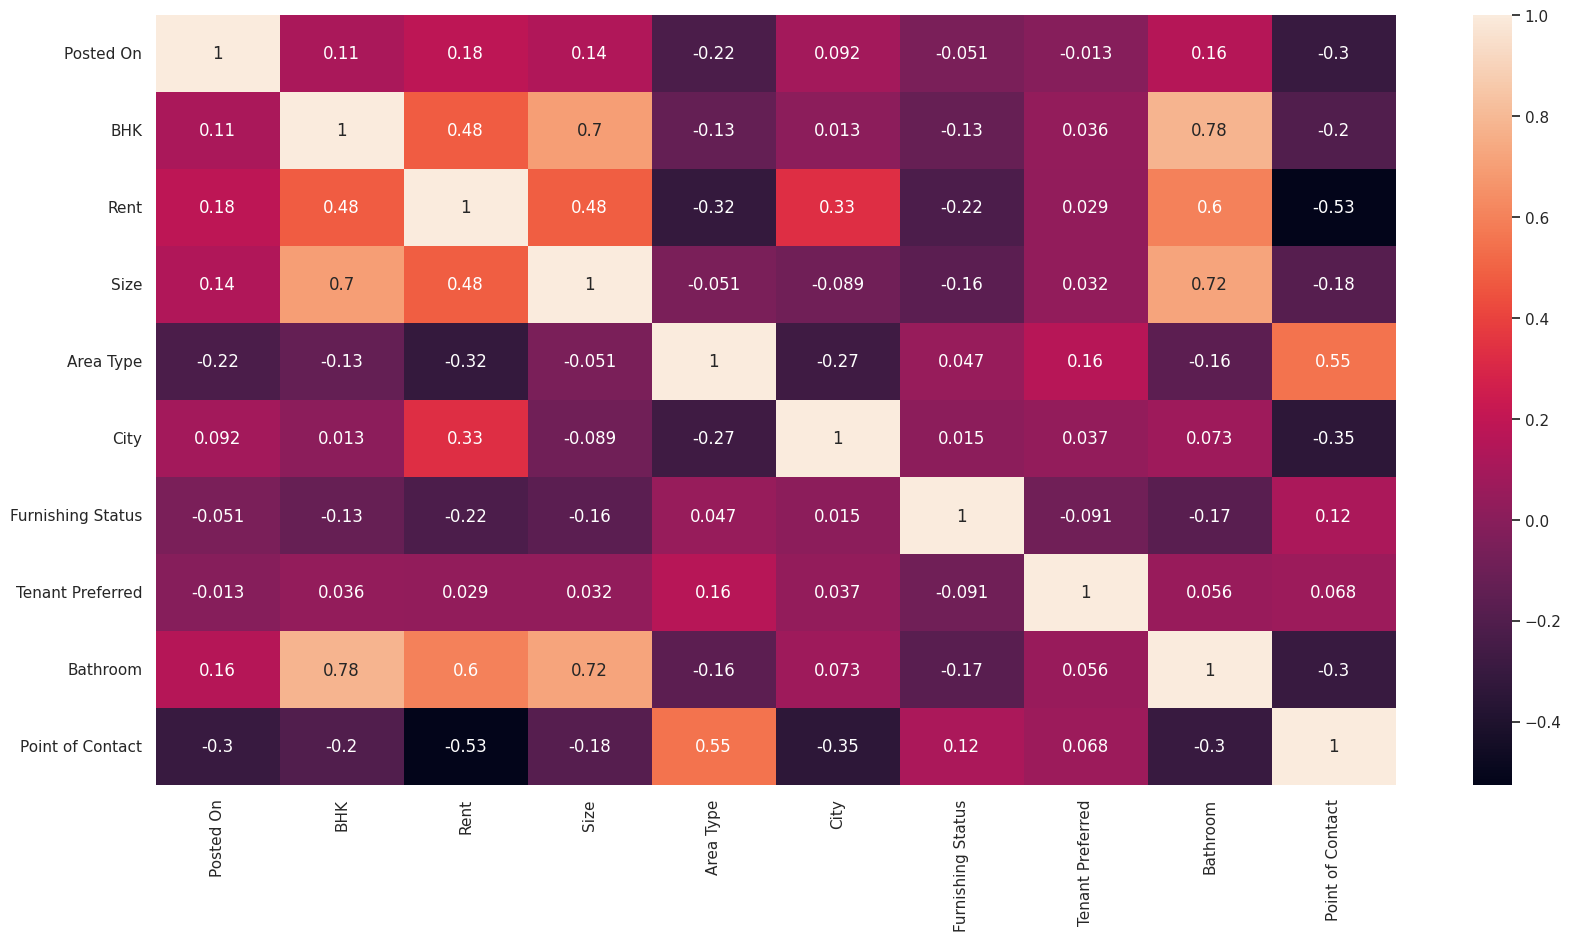

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

# Model Building

In [71]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='Rent',axis=1)
y=df['Rent']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
df.head()

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,26,2,10000,1100,2,4,2,1,2,2
1,21,2,20000,800,2,4,1,1,1,2
2,24,2,17000,1000,2,4,1,1,1,2
3,73,2,10000,800,2,4,2,1,1,2
4,17,2,7500,850,1,4,2,0,1,2


In [73]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb=XGBRegressor()
param_grid=({
    'learning_rate':[0.1,1,0.01],
    'max_depth':[2,3,5],
    'n_estimators':[100,50,200,150,250]
})
grid=GridSearchCV(xgb,param_grid,cv=5)
grid.fit(X_train_scaled,y_train)
print(grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [74]:
xgb=XGBRegressor(learning_rate=0.1,max_depth=2,n_estimators=50)
xgb.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [75]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y_pred=xgb.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('R2 Score:',r2_score)

MSE: 350652163.24445987
MAE: 9986.784895415998
R2 Score: 0.715246319770813


<ipython-input-83-bda57264142f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kolom',y='Importance',data=imp,palette='viridis')


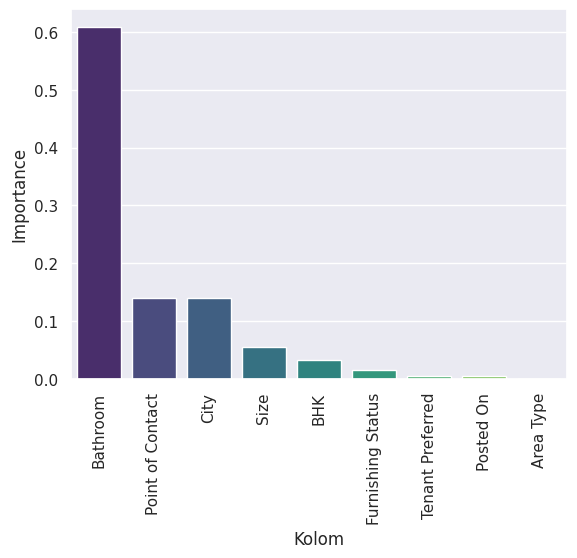

In [83]:
imp_df=pd.DataFrame({
    'Kolom':X_train.columns,
    'Importance':xgb.feature_importances_
})
imp=imp_df.nlargest(10,'Importance')
sns.barplot(x='Kolom',y='Importance',data=imp,palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [86]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [88]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y_pred=rf.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('R2 Score:',r2_score)

MSE: 302839549.3762902
MAE: 8913.802842796093
R2 Score: 0.7540734527442382


<ipython-input-91-971c28177f91>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_imp['Kolom'],y=top_imp['Importance'],palette='viridis')


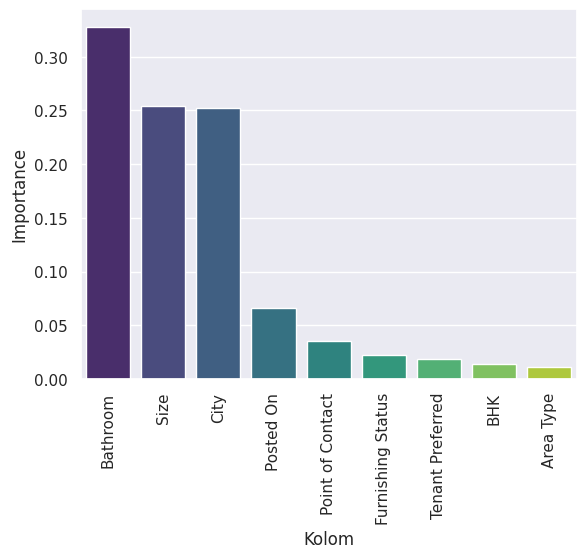

In [91]:
imp_df=pd.DataFrame({
    'Kolom':X_train.columns,
    'Importance':rf.feature_importances_
})
imp=imp_df.sort_values(by='Importance',ascending=False)
top_imp=imp.head(10)
sns.barplot(x=top_imp['Kolom'],y=top_imp['Importance'],palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [94]:
input_user=[[24,	3,	1200,	3,	4,	2,	1,	2,	2]]
input_scaled=scaler.transform(input_user)
predict=rf.predict(input_scaled)
print('Harga Sewa:',predict)

Harga Sewa: [18881.81]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
